In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
conda install -c conda-forge keras=2.6

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | 

In [2]:
data = pd.read_csv(r'kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.shape

(400, 26)

In [4]:
# Columns to keep

data_cols = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

In [5]:
# Droppping other columns

data.drop([col for col in data.columns if not col in data_cols], axis=1, inplace=True)

In [6]:
# Dropping the rows that are null

data.dropna(axis=0, inplace=True)

In [7]:
# Transforming non numerical cols
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

for col in data.columns:
    if data[col].dtype == np.number:
        continue
    data[col] = LabelEncoder().fit_transform(data[col])

<ipython-input-7-0b05e5f4a85f>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[col].dtype == np.number:


In [8]:
data.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [9]:
# Splitting data
from sklearn.model_selection import train_test_split

x = data.drop('classification', axis=1)
y = data['classification']

In [10]:
x_scaler = MinMaxScaler()
x_scaler.fit(x)
col_names = x.columns
x[col_names] = x_scaler.transform(x)

In [11]:
x.head()

,sg,al,sc,hemo,pcv,htn
0,0.75,0.2,0.033898,0.836735,0.717949,1.0
1,0.75,0.8,0.016949,0.557823,0.564103,0.0
2,0.25,0.4,0.059322,0.442177,0.384615,0.0
3,0.00,0.8,0.144068,0.551020,0.410256,1.0
4,0.25,0.4,0.042373,0.578231,0.487179,0.0


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_test.shape)

(58, 6)


In [13]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

def model_evaluation(y_test, y_pred):
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))    
    print('Precision Score:', precision_score(y_test, y_pred))    
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('f1_score:', f1_score(y_test, y_pred))    

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

In [15]:
model_evaluation(y_test, lr_pred)

Accuracy Score: 0.9655172413793104
Recall Score: 1.0
Precision Score: 0.9230769230769231
Confusion Matrix:
 [[32  2]
 [ 0 24]]
f1_score: 0.9600000000000001


In [16]:

# conda install -c conda-forge tensorflow=2.4.0


In [ ]:
#conda install -c conda-forge keras=2.6

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 

In [1]:
#pip install keras

Note: you may need to restart the kernel to use updated packages.


In [16]:
from keras.models import Sequential, load_model
from keras.layers import Dense
import keras as k

ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (/home/salman/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/context.py)

In [21]:
# ANN MODEL

model = Sequential()
model.add(Dense(256, input_dim=len(x.columns), kernel_initializer = k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1, activation='hard_sigmoid'))

#256 neurons, input_dim = no of input features(layers), k_init generates tensors within normal dist

NameError: name 'Sequential' is not defined

In [23]:
import keras as k
print(k.__version__)

ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (/home/salman/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/context.py)

In [19]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Train the model
history = model.fit(x_train, y_train, epochs=2000, batch_size=x_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 2/2000
1/1 [==============================] - 0s 995us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 4/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 6/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 8/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 9/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 10/2000
1/1 [==============================] - 0s 823us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 11/2000
1

1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 166/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 167/2000
1/1 [==============================] - 0s 964us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 168/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 169/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 170/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 171/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 172/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 173/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 174/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 175/200

1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 328/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 329/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 330/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 331/2000
1/1 [==============================] - 0s 962us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 332/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 333/2000
1/1 [==============================] - 0s 923us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 334/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 335/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 336/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 337/2

1/1 [==============================] - 0s 796us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 490/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 491/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 492/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 493/2000
1/1 [==============================] - 0s 904us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 494/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 495/2000
1/1 [==============================] - 0s 892us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 496/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 497/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 498/2000
1/1 [==============================] - 0s 942us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 4

1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 571/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 572/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 573/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 574/2000
1/1 [==============================] - 0s 953us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 575/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 576/2000
1/1 [==============================] - 0s 973us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 577/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 578/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 579/2000
1/1 [==============================] - 0s 928us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 580

Epoch 651/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 652/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 653/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 654/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 655/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 656/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 657/2000
1/1 [==============================] - 0s 912us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 658/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 659/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 660/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.043

1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 814/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 815/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 816/2000
1/1 [==============================] - 0s 961us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 817/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 818/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 819/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 820/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 821/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 822/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 823/200

1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 975/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 976/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 977/2000
1/1 [==============================] - 0s 858us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 978/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 979/2000
1/1 [==============================] - 0s 798us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 980/2000
1/1 [==============================] - 0s 908us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 981/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 982/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 983/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 984

1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1056/2000
1/1 [==============================] - 0s 987us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1057/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1058/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1059/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1060/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1061/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1062/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1063/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1064/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoc

1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1216/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1217/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1218/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1219/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1220/2000
1/1 [==============================] - 0s 968us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1221/2000
1/1 [==============================] - 0s 983us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1222/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1223/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1224/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Ep

1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1376/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1377/2000
1/1 [==============================] - 0s 979us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1378/2000
1/1 [==============================] - 0s 831us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1379/2000
1/1 [==============================] - 0s 915us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1380/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1381/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1382/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1383/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1384/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437


1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1457/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1458/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1459/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1460/2000
1/1 [==============================] - 0s 778us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1461/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1462/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1463/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1464/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1465/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1617/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1618/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1619/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1620/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1621/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1622/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1623/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1624/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1625/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 

Epoch 1697/2000
1/1 [==============================] - 0s 781us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1698/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1699/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1700/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1701/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1702/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1703/2000
1/1 [==============================] - 0s 977us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1704/2000
1/1 [==============================] - 0s 914us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1705/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1706/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - a

1/1 [==============================] - 0s 855us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1858/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1859/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1860/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1861/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1862/2000
1/1 [==============================] - 0s 767us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1863/2000
1/1 [==============================] - 0s 976us/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1864/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1865/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0437
Epoch 1866/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.0772 - accuracy: 0.0437


Text(0.5, 0, 'epoch')

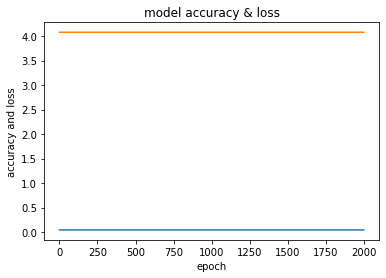

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [26]:
print(x_test.shape)
model.predict(x_test)

(58, 6)


array([[0.75      , 0.4       , 0.28813559, 0.43537415, 0.33333333,
        1.        ],
       [1.        , 0.        , 0.01271186, 0.80272109, 0.74358974,
        0.        ],
       [0.25      , 0.4       , 0.08050847, 0.32653061, 0.25641026,
        0.        ],
       [1.        , 0.        , 0.01271186, 0.97278912, 0.92307692,
        0.        ],
       [1.        , 0.        , 0.02118644, 0.70068027, 0.64102564,
        0.        ],
       [0.75      , 0.        , 0.01271186, 0.80952381, 0.69230769,
        0.        ],
       [0.75      , 0.6       , 0.05932203, 0.54421769, 0.51282051,
        0.        ],
       [0.25      , 0.6       , 0.16949153, 0.46938776, 0.41025641,
        1.        ],
       [0.5       , 0.2       , 0.29237288, 0.68027211, 0.64102564,
        0.        ],
       [0.25      , 0.6       , 0.25      , 0.44897959, 0.30769231,
        1.        ],
       [0.25      , 0.6       , 0.09745763, 0.57142857, 0.48717949,
        1.        ],
       [1.        , 0

In [23]:
import joblib

joblib.dump(model, 'kidney-logRed.pkl')

TypeError: cannot pickle 'weakref' object

In [24]:
model.save('kidney.pkl')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: kidney.pkl/assets
